In [ ]:
# 파일 확인 ( ls 명령어 사용 )
%%bash

# ls -l drive/MyDrive/Colab\ Notebooks/data-files

total 831524
-rw------- 1 root root     30286 May 22  2023 auto-mpg.data
-rw------- 1 root root 851449253 Feb  8  2024 dogs-vs-cats.zip


In [ ]:
# 파일 복사 ( google driver -> sample_date )
%%bash

# cp drive/MyDrive/Colab\ Notebooks/data-files/dogs-vs-cats.zip sample_data/

In [ ]:
# 압축 풀기
%%bash

# mkdir sample_data/dogs-vs-cats
# unzip sample_data/dogs-vs-cats.zip -d sample_data/dogs-vs-cats/

# unzip sample_data/dogs-vs-cats.zip -d sample_data/


Archive:  sample_data/dogs-vs-cats.zip
   creating: sample_data/dogs-vs-cats/
  inflating: sample_data/__MACOSX/._dogs-vs-cats  
  inflating: sample_data/dogs-vs-cats/.DS_Store  
  inflating: sample_data/__MACOSX/dogs-vs-cats/._.DS_Store  
  inflating: sample_data/dogs-vs-cats/test1.zip  
  inflating: sample_data/__MACOSX/dogs-vs-cats/._test1.zip  
  inflating: sample_data/dogs-vs-cats/train.zip  
  inflating: sample_data/__MACOSX/dogs-vs-cats/._train.zip  


In [ ]:
# 불필요한 파일 제거
%%bash
# rm -rf sample_data/__MACOSX

In [ ]:
# 압축 풀기 2 (하위 폴더의 train.zip, test1.zip 파일 압축 해제)
%%bash

# mkdir sample_data/dogs-vs-cats/train
# unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats/train/
# mkdir sample_data/dogs-vs-cats/test
# unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats/test/

# unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
# unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats
# mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

In [ ]:
# 위 작업 일괄 처리 (파일 압축 해제)

%%bash

rm -rf sample_data/dogs-vs-cats
rm -rf sample_data/dogs-vs-cats2

cp drive/MyDrive/Colab\ Notebooks/data-files/dogs-vs-cats.zip sample_data/
unzip sample_data/dogs-vs-cats.zip -d sample_data/

unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats
mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

rm -rf sample_data/__MACOSX

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [3]:
# 데이터 디렉터리 구성
# train_dir, test_dir, validation_dir # 훈련, 테스트, 검증 세트 폴드
# train_dir -> cats, dogs # 범주로 사용될 폴더
# test_dir -> cats, dogs
# validation_dir -> cats, dogs

import os, shutil

src_base = 'sample_data/dogs-vs-cats'
dest_base = 'sample_data/dogs-vs-cats2'

if os.path.exists(dest_base): # 이미 존재하는 폴더라면
  shutil.rmtree(dest_base)    # 폴더 제거 후
os.makedirs(dest_base)        # 새로 폴더 만들기

# train 폴더의 0 ~ 1000 : trainset,  1000 ~ 1500 : validationset, 1500 ~ 2000 : testset
for start, stop, path in zip([0, 1000, 1500], [1000, 1500, 2000], ['train', 'validation', 'test']):
  os.mkdir(os.path.join(dest_base, path)) # train or validation or test 폴더 생성
  for sub_path in ['cat', 'dog']:
    os.mkdir(os.path.join(dest_base, path, sub_path)) # train, validation, test 하위에 cats or dog 폴더 생성
    for idx in np.arange(start, stop):
      fname = f'{sub_path}.{idx}.jpg'
      shutil.copy(os.path.join(src_base, 'train', fname), os.path.join(dest_base, path, sub_path, fname))

In [4]:
# 디렉터리 구성 결과 확인
for path in ['train', 'test', 'validation']:
  for subpath in ['dog', 'cat']:
    print(path, '/', subpath, ':', len(os.listdir(f'sample_data/dogs-vs-cats2/{path}/{subpath}')))

train / dog : 1000
train / cat : 1000
test / dog : 500
test / cat : 500
validation / dog : 500
validation / cat : 500


In [5]:
# 입력 자동화 도구 만들기

# 특정 디렉터리의 파일을 읽어서 모델의 입력데이터로 변환하는 도구
train_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [6]:
# 입력 데이터 구성

datasets = []
for path, generator in zip( ['train', 'test', 'validation'],
                            [train_generator, test_generator, validation_generator]):
  dataset = generator.flow_from_directory(directory=f'sample_data/dogs-vs-cats2/{path}',
                                          target_size=(256, 256),
                                          batch_size=32,
                                          class_mode="binary")
  datasets.append(dataset)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
print( type(datasets[0]) )
for x_batch, y_batch in datasets[0]:
  print(x_batch.shape, y_batch.shape)
  print(x_batch[0].max())
  print(y_batch)
  break

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 256, 256, 3) (32,)
1.0
[1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0.]


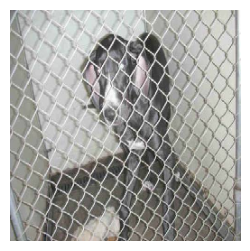

In [8]:
plt.figure(figsize=(3, 3))
plt.imshow(x_batch[4])
plt.axis('off')
plt.show()

In [ ]:
# 이미 만들어진 모델 가져오기 1
base_model = tf_keras.applications.vgg16.VGG16()

base_model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 이미 만들어진 모델 가져오기 2 ( 최상위 판별층 제외 )

base_model = tf_keras.applications.vgg16.VGG16(include_top=False,
                                               weights="imagenet",
                                               input_shape=(256, 256, 3))

base_model.trainable = False # fit 실행할 때 가중치 업데이트 수행 X

base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [13]:
# 모델 구조 설계 ( 사전 학습 모델을 통해 만든 특성맵 데이터를 입력으로 사용하는 판별 모델 )

input = tf_keras.layers.Input(shape=(256, 256, 3))
x = base_model(input)
x = tf_keras.layers.Flatten()(x)
x = tf_keras.layers.Dense(256, activation='relu')(x)
output = tf_keras.layers.Dense(1, activation='sigmoid')(x)
full_model = tf_keras.models.Model(inputs=input, outputs=output)

full_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 8, 8, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
# 모델 학습 설계 ( 사전 학습 모델을 통해 만든 특성맵 데이터를 입력으로 사용하는 판별 모델 )

full_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

In [15]:
# 판별 모델 학습

history = full_model.fit(datasets[0],
                         epochs=20,
                         validation_data=(datasets[2]))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 58s 573ms/step - accuracy: 0.6027 - loss: 2.1709 - val_accuracy: 0.9010 - val_loss: 0.2584
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 237ms/step - accuracy: 0.9171 - loss: 0.2115 - val_accuracy: 0.8840 - val_loss: 0.2719
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 240ms/step - accuracy: 0.9699 - loss: 0.1059 - val_accuracy: 0.9160 - val_loss: 0.1977
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 241ms/step - accuracy: 0.9861 - loss: 0.0703 - val_accuracy: 0.9160 - val_loss: 0.1905
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 244ms/step - accuracy: 0.9961 - loss: 0.0416 - val_accuracy: 0.9210 - val_loss: 0.1895
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.9999 - loss: 0.0249 - val_accuracy: 0.9310 - val_loss: 0.1851
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 241ms/step - accuracy: 1.0000 - loss: 0.0180 - val_accuracy: 0.9230 - val_loss: 0.1943
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - accuracy: 1.0000 - loss: 0.0114 - val_accuracy: 0.929

In [16]:
print( full_model.evaluate(datasets[0]) )
print( full_model.evaluate(datasets[1]) )

63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 1.0000 - loss: 0.0013
[0.0011901443358510733, 1.0]


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9024 - loss: 0.2866
[0.24431279301643372, 0.9150000214576721]
